
******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************



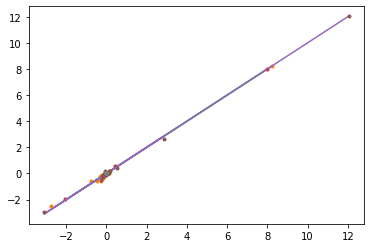

In [1]:
from casadi import *
import numpy as np
import pandas as pd
from numpy.linalg import norm
import sADMM
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

raw = pd.read_csv("drone1.csv") 
# scale data to have zero mean and std = 1
scaler = StandardScaler()
data = scaler.fit_transform(raw)

x = data[0:40,0:15]
y = data[0:40,15:19]

nu = 15                    # no. of inputs
ny = 4                     # no. of outputs
nn = 5                    # no. of neurons 
nw =  nu*nn+nn+ny*nn+ny    # no. of parameters

# Solve centralized optimization
solver,nlp = sADMM.MLP_regression(x,y,nn)
Primal,Dual,f = sADMM.solvenlp(solver,nlp)
w_opt = Primal.full()

# Prediction
y_pred = np.transpose(sADMM.MLP(x,w_opt,nu,nn,ny).full())
plt.plot(y[:,0],y[:,0])
plt.plot(y[:,0],y_pred[:,0],'.')

plt.plot(y[:,1],y[:,1])
plt.plot(y[:,1],y_pred[:,1],'.')

plt.plot(y[:,2],y[:,2])
plt.plot(y[:,2],y_pred[:,2],'.')

plt.plot(y[:,3],y[:,3])
plt.plot(y[:,3],y_pred[:,3],'.')

In [2]:
raw = pd.read_csv("drone1.csv") 
# scale data to have zero mean and std = 1
scaler = StandardScaler()
data = scaler.fit_transform(raw)

x1 = data[0:40,0:15]
y1 = data[0:40,15:19]

raw = pd.read_csv("drone2.csv") 
# scale data to have zero mean and std = 1
scaler = StandardScaler()
data = scaler.fit_transform(raw)
 
x2 = data[0:40,0:15]
y2 = data[0:40,15:19]


raw = pd.read_csv("drone3.csv") 
# scale data to have zero mean and std = 1
scaler = StandardScaler()
data = scaler.fit_transform(raw)

x3 = data[0:40,0:15]
y3 = data[0:40,15:19]


N = 3
rho = 1 # penalty term in the Augmented Lagrangian

solver1,nlp1 = sADMM.consensus_subproblem_nn(x1,y1,nn,rho)
solver2,nlp2 = sADMM.consensus_subproblem_nn(x2,y2,nn,rho)
solver3,nlp3 = sADMM.consensus_subproblem_nn(x3,y3,nn,rho)

solvers = [solver1,solver2,solver3]
nlps = [nlp1,nlp2,nlp3]

np.random.seed(12)
xinit = np.random.rand(nw,1)

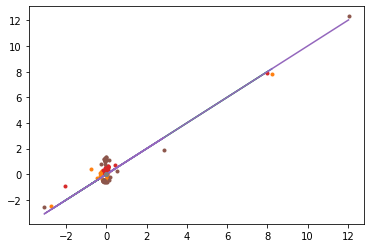

In [3]:
x0_opt = xinit    # initial guess for x0
lam = np.ones(nw)      # initial guess for lambda_i
Lam = []
for i in range(0,len(solvers)):
    Lam.append(lam)  # Lam = [lambda_1,...lambda_N]
    
x0_opt,x_opt,r_primal,r_dual = sADMM.ADMM_consensus(solvers,nlps,x0_opt,Lam,rho,MaxIter=30)

# Prediction
y_pred = np.transpose(sADMM.MLP(x,x0_opt,nu,nn,ny).full())
plt.plot(y[:,0],y[:,0])
plt.plot(y[:,0],y_pred[:,0],'.')

plt.plot(y[:,1],y[:,1])
plt.plot(y[:,1],y_pred[:,1],'.')

plt.plot(y[:,2],y[:,2])
plt.plot(y[:,2],y_pred[:,2],'.')

plt.plot(y[:,3],y[:,3])
plt.plot(y[:,3],y_pred[:,3],'.')

In [4]:
x0_opt = xinit   # initial guess for x0
lam = np.ones(nw)      # initial guess for lambda_i
Lam = []
for i in range(0,len(solvers)):
    Lam.append(lam)  # Lam = [lambda_1,...lambda_N]
    
x0_opt,x_opt,r_primal1,r_dual1,r_app = sADMM.sADMM_consensus(solvers,nlps,x0_opt,Lam,rho,MaxIter=30)

# Prediction
y_pred = np.transpose(sADMM.MLP(x,x0_opt,nu,nn,ny).full())
plt.plot(y[:,0],y[:,0])
plt.plot(y[:,0],y_pred[:,0],'.')

plt.plot(y[:,1],y[:,1])
plt.plot(y[:,1],y_pred[:,1],'.')

plt.plot(y[:,2],y[:,2])
plt.plot(y[:,2],y_pred[:,2],'.')

plt.plot(y[:,3],y[:,3])
plt.plot(y[:,3],y_pred[:,3],'.')

NameError: name 'r_app' is not defined

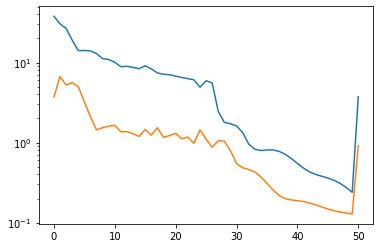

In [5]:
plt.plot(r_primal)
plt.plot(r_dual)
plt.plot(r_primal1)
plt.plot(r_dual1)
plt.yscale("log")
plt.show()